0.9777777777777777
[6]


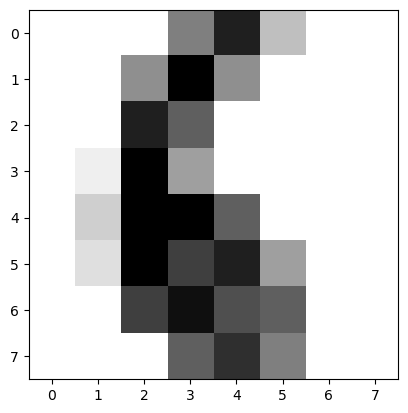

In [5]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation='nearest')

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size = 0.2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

plt.imshow(X_test[10].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
y_pred = knn.predict([X_test[10]])
print(y_pred)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# 1) 데이터 로드 및 전처리
digits = load_digits()
X = digits.images.reshape(-1, 64).astype(np.float32)  # (n_samples, 64)
y = digits.target.astype(np.int64)                    # (n_samples,)

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# numpy → torch.Tensor 변환
train_ds = torch.utils.data.TensorDataset(
    torch.from_numpy(X_train), torch.from_numpy(y_train)
)
test_ds = torch.utils.data.TensorDataset(
    torch.from_numpy(X_test), torch.from_numpy(y_test)
)
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_ds,  batch_size=32, shuffle=False)

In [8]:
# 2) 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        return self.net(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DNN().to(device)

In [9]:
# 3) 손실함수, 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [10]:
# 4) 학습 루프
num_epochs = 20
for epoch in range(1, num_epochs+1):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch:2d}/{num_epochs} — Loss: {avg_loss:.4f}")

Epoch  1/20 — Loss: 1.0223
Epoch  2/20 — Loss: 0.2637
Epoch  3/20 — Loss: 0.1494
Epoch  4/20 — Loss: 0.1047
Epoch  5/20 — Loss: 0.0778
Epoch  6/20 — Loss: 0.0569
Epoch  7/20 — Loss: 0.0479
Epoch  8/20 — Loss: 0.0331
Epoch  9/20 — Loss: 0.0296
Epoch 10/20 — Loss: 0.0205
Epoch 11/20 — Loss: 0.0227
Epoch 12/20 — Loss: 0.0136
Epoch 13/20 — Loss: 0.0122
Epoch 14/20 — Loss: 0.0084
Epoch 15/20 — Loss: 0.0078
Epoch 16/20 — Loss: 0.0092
Epoch 17/20 — Loss: 0.0062
Epoch 18/20 — Loss: 0.0037
Epoch 19/20 — Loss: 0.0032
Epoch 20/20 — Loss: 0.0026


In [11]:
# 5) 평가
model.eval()
correct = 0
with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        out = model(xb)
        preds = out.argmax(dim=1)
        correct += (preds == yb).sum().item()
acc = correct / len(test_loader.dataset)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.9833


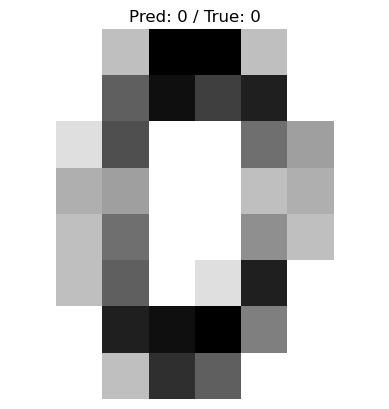

In [12]:
# 6) 샘플 시각화
idx = 10
plt.imshow(X_test[idx].reshape(8,8), cmap='gray_r', interpolation='nearest')
with torch.no_grad():
    sample = torch.from_numpy(X_test[idx]).unsqueeze(0).to(device)
    pred_label = model(sample).argmax().item()
plt.title(f"Pred: {pred_label} / True: {y_test[idx]}")
plt.axis('off')
plt.show()
